In [24]:
# cella configurazione
ERRORE = 1e-5


In [25]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def load_and_preprocess_data(file_path, delimiter=';', decimal=','):
    """Load and preprocess data from a CSV file."""
    data = pd.read_csv(file_path, delimiter=delimiter, decimal=decimal)
    data['volt'] = pd.to_numeric(data['volt'], errors='coerce')
    data['ampere'] = pd.to_numeric(data['ampere'], errors='coerce')
    data = data.dropna()  # Drop any rows with NaN values
    data = data.sort_values(by='volt', ascending=True)
    return data

def model(x, A, B, C):
    """Exponential model function."""
    return A * (np.exp(B * x) - 1) - C

def perform_curve_fit(x, y, initial_guess=None, bounds=None):
    """Perform curve fitting and return optimized parameters."""
    if initial_guess is None:
        initial_guess = [1, 0.1, 0]  # Default initial guess
    if bounds is None:
        bounds = ([-np.inf, 0, -np.inf], [np.inf, np.inf, np.inf])  # Default bounds
    popt, _ = curve_fit(model, x, y, p0=initial_guess, bounds=bounds)
    return popt

def plot_data_and_fit(ax, x, y, fit_params, file_name):
    """Plot the original data and the fitted curve on a given axis."""
    A, B, C = fit_params
    ax.scatter(x, y, label='Data', color='blue')
    ax.plot(x, model(x, *fit_params), label='Fit', color='red')
    ax.set_xlabel('Volt')
    ax.set_ylabel('Ampere')
    ax.legend()
    ax.set_title(f'{file_name}')

from scipy.stats import chi2

def calculate_chi_squared(x, y, fit_params, sigma=ERRORE):
    """Calculate the Chi-squared statistic for the fit."""
    y_model = model(x, *fit_params)
    chi_squared = np.sum(((y - y_model) / sigma) ** 2)
    return chi_squared

def calculate_p_value(chi_squared, df):
    """Calculate the p-value for the Chi-squared statistic."""
    return chi2.sf(chi_squared, df)

File: pn filtro 02.csv
Fitted coefficients: A = 6.176e-08, B = 1.911e+01, C = 6.802e-04
Chi-squared: 4.403, p-value: 1.000e+00

File: pn filtro 04.csv
Fitted coefficients: A = 3.881e-08, B = 2.005e+01, C = 3.950e-04
Chi-squared: 2.456, p-value: 1.000e+00

File: pn filtro 06.csv
Fitted coefficients: A = 8.123e-10, B = 2.303e+01, C = 2.210e-05
Chi-squared: 0.006, p-value: 1.000e+00

File: pn filtro no.csv
Fitted coefficients: A = 2.199e-07, B = 1.697e+01, C = 1.025e-03
Chi-squared: 3.522, p-value: 1.000e+00



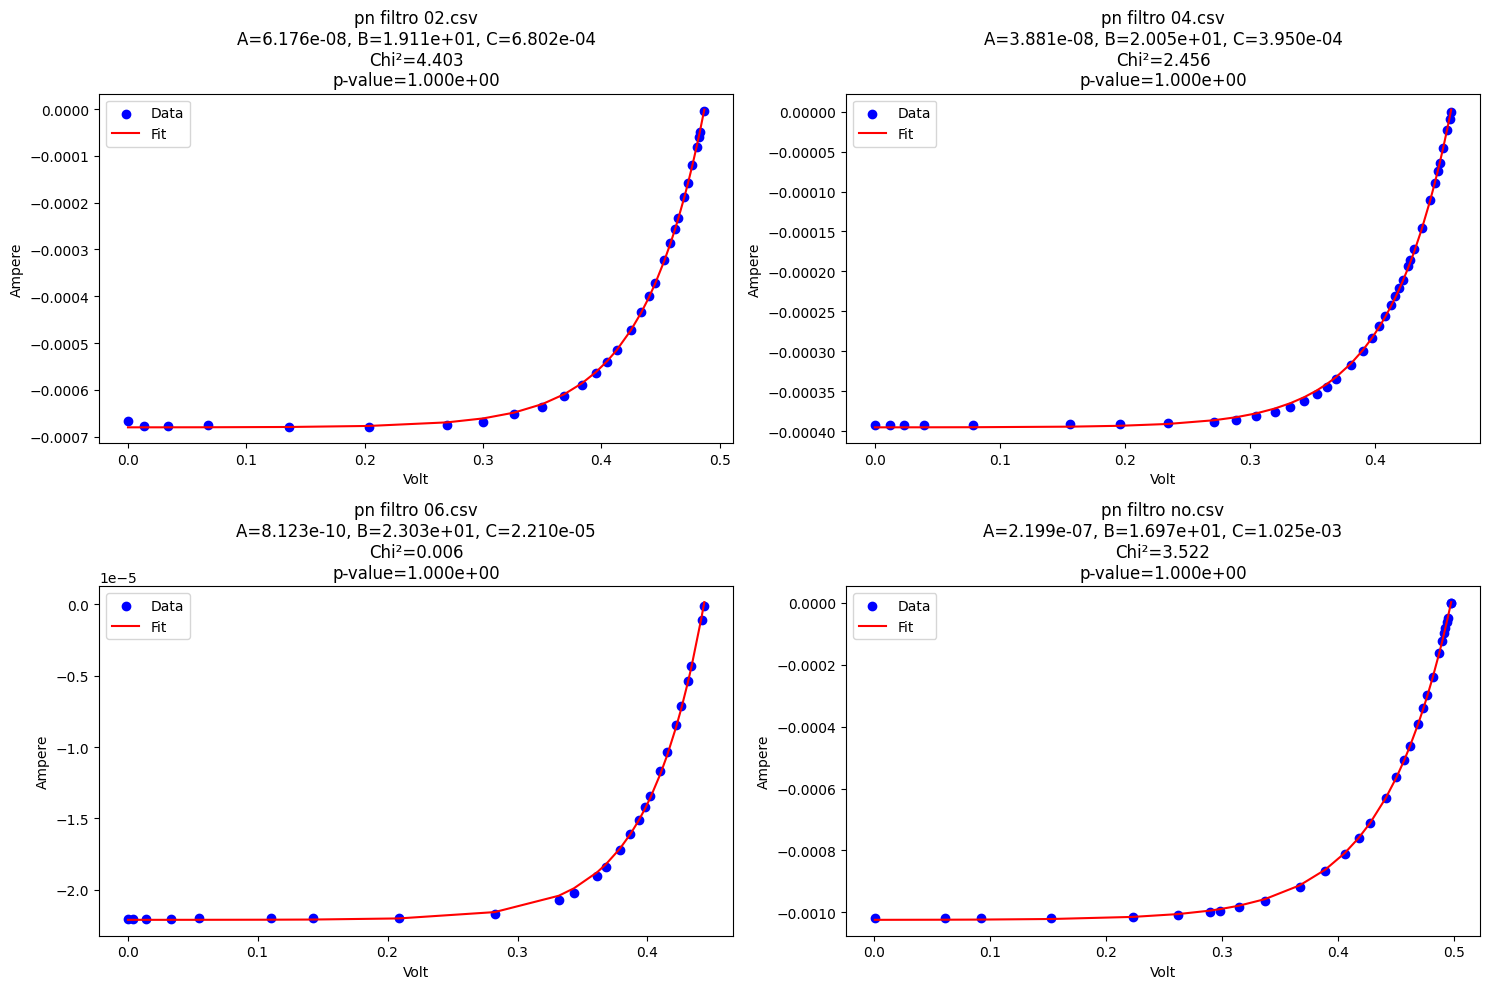

In [26]:
def main():
    # File paths
    file_names = [
        "pn filtro 02.csv",
        "pn filtro 04.csv",
        "pn filtro 06.csv",
        "pn filtro no.csv"
    ]
    folder = "data/"
    
    # Set up subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, file_name in enumerate(file_names):
        file_path = folder + file_name
        
        # Load and preprocess data
        data = load_and_preprocess_data(file_path)
        y = data['ampere']
        x = data['volt']
        
        # Perform curve fitting
        fit_params = perform_curve_fit(x, y)
        A, B, C = fit_params
        
        # Calculate Chi-squared
        chi_squared = calculate_chi_squared(x, y, fit_params)
        
        # Calculate degrees of freedom and p-value
        df = len(x) - 3  # Number of data points - number of parameters (A, B, C)
        p_value = calculate_p_value(chi_squared, df)
        
        print(f"File: {file_name}")
        print(f"Fitted coefficients: A = {A:.3e}, B = {B:.3e}, C = {C:.3e}")
        print(f"Chi-squared: {chi_squared:.3f}, p-value: {p_value:.3e}\n")
        
        # Plot the results with Chi-squared and p-value in the title
        plot_data_and_fit(axes[i], x, y, fit_params, 
                          f"{file_name}\nA={A:.3e}, B={B:.3e}, C={C:.3e}\nChi²={chi_squared:.3f}\np-value={p_value:.3e}")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()